In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Original image (2x3 grayscale)
test_img = np.array([[30, 45, 60], [14, 15, 63]], dtype=np.uint8)

# Define the scale factor for zooming
scale_factor = 3

# Compute the new size (width * scale_factor, height * scale_factor)
new_size = (test_img.shape[1] * scale_factor, test_img.shape[0] * scale_factor)

# Resize the image using nearest neighbor interpolation
zoomed_test_img_nn = cv2.resize(test_img, new_size, interpolation=cv2.INTER_NEAREST)

# Resize the image using bilinear interpolation
zoomed_test_img_bilinear = cv2.resize(test_img, new_size, interpolation=cv2.INTER_LINEAR)

In [2]:
# Function to zoom the image
def zoom_image(image, scale, interpolation):
    height, width = image.shape[:2]
    new_size = (int(width * scale), int(height * scale))
    return cv2.resize(image, new_size, interpolation=interpolation)

# Function to compute normalized SSD between two images
def compute_normalized_ssd(img1, img2, bypass_size_error=True):
    if not bypass_size_error:
        # Ensure images are of the same size
        assert img1.shape == img2.shape, "Images must be the same shape for SSD computation."
    else: 
        # Crop the larger image to match the smaller image
        min_height = min(img1.shape[0], img2.shape[0])
        min_width = min(img1.shape[1], img2.shape[1])

        img1 = img1[:min_height, :min_width]
        img2 = img2[:min_height, :min_width]

    
    
    # Compute the sum of squared differences
    ssd = np.sum((img1.astype("float32") - img2.astype("float32")) ** 2)
    
    # Normalize by the number of pixels
    norm_ssd = ssd / np.prod(img1.shape)
    
    return norm_ssd

# Function to display images side-by-side
def display_images(original, nearest, bilinear, titles):
    plt.figure(figsize=(15, 15))

    # Original image
    plt.subplot(3, 1, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    # Nearest-neighbor zoomed image
    plt.subplot(3, 1, 2)
    plt.imshow(cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    # Bilinear zoomed image
    plt.subplot(3,1, 3)
    plt.imshow(cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    plt.show()


def get_zoom_and_orignal_img(small_img, big_img, scale_factor=4, bypass_size_error=True):
        # Scale factor
    scale_factor = 4

    # Zoom using nearest-neighbor interpolation
    zoomed_nn = zoom_image(small_img, scale_factor, cv2.INTER_NEAREST)

    # Zoom using bilinear interpolation
    zoomed_bilinear = zoom_image(small_img, scale_factor, cv2.INTER_LINEAR)

    # Compute normalized SSD for nearest-neighbor zoomed image
    ssd_nn = compute_normalized_ssd(big_img, zoomed_nn, bypass_size_error=bypass_size_error)

    # Compute normalized SSD for bilinear zoomed image
    ssd_bilinear = compute_normalized_ssd(big_img, zoomed_bilinear, bypass_size_error=bypass_size_error)

    # Print out SSD values
    print(f"Normalized SSD (Nearest Neighbor): {ssd_nn}")
    print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

    # Display the images
    titles = ["Original Image", f"Nearest Neighbor Zoomed, ssd={ssd_nn}", f"Bilinear Zoomed, ssd={ssd_bilinear}"]
    display_images(big_img, zoomed_nn, zoomed_bilinear, titles)

In [3]:
im01_small_img = cv2.imread("a1images/a1q5images/im01small.png")
im01_img = cv2.imread("a1images/a1q5images/im01.png")

im02_small_img = cv2.imread("a1images/a1q5images/im02small.png")
im02_img = cv2.imread("a1images/a1q5images/im02.png")

im03_small_img = cv2.imread("a1images/a1q5images/im03small.png")
im03_img = cv2.imread("a1images/a1q5images/im03.png")

taylor_very_small_img = cv2.imread("a1images/a1q5images/taylor_very_small.jpg")
taylor_small_img = cv2.imread("a1images/a1q5images/taylor_small.jpg")
taylor_img = cv2.imread("a1images/a1q5images/taylor.jpg")

Normalized SSD (Nearest Neighbor): 136.2690534979424
Normalized SSD (Bilinear): 115.09185185185186


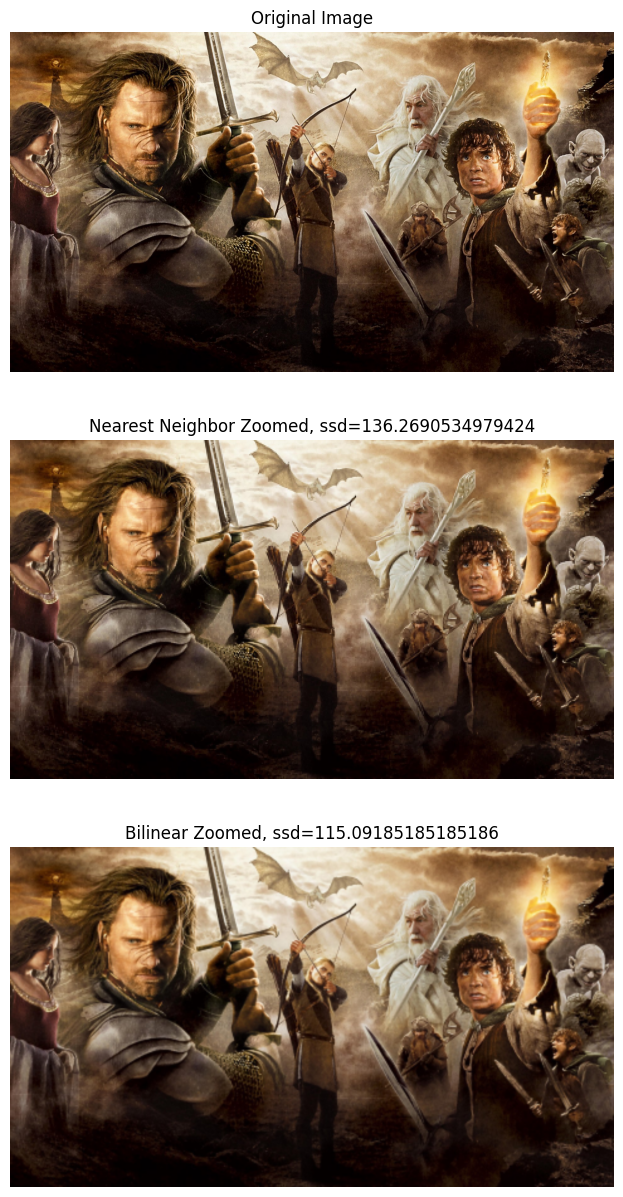

In [4]:
get_zoom_and_orignal_img(small_img=im01_small_img, big_img=im01_img, scale_factor=4, bypass_size_error=False)

Normalized SSD (Nearest Neighbor): 26.446071759259258
Normalized SSD (Bilinear): 18.34591087962963


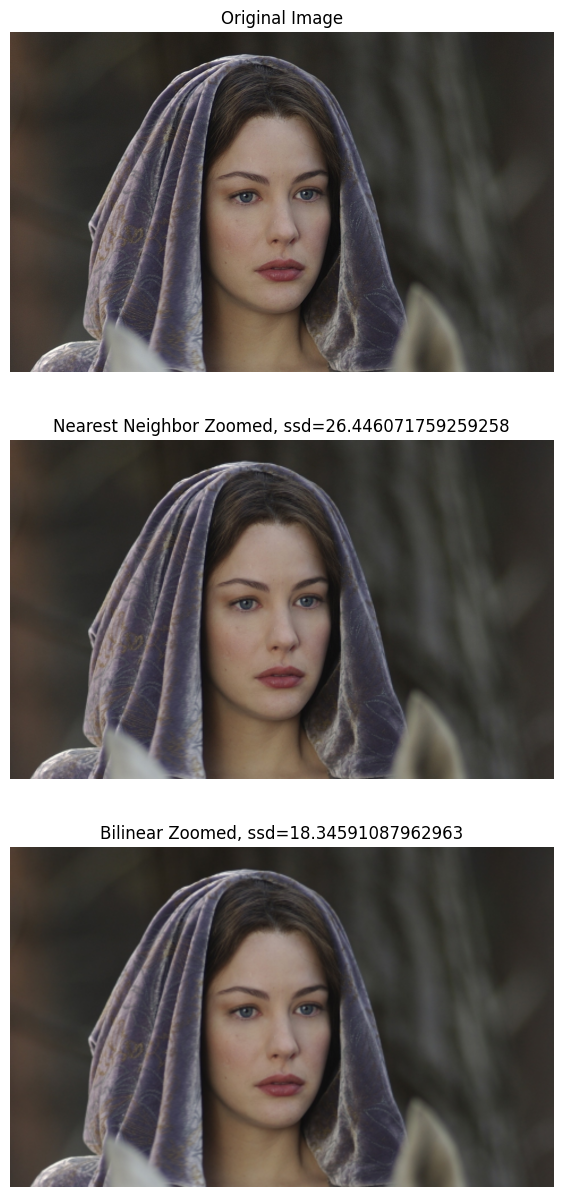

In [5]:
get_zoom_and_orignal_img(small_img=im02_small_img, big_img=im02_img, scale_factor=4, bypass_size_error=False)

Normalized SSD (Nearest Neighbor): 67.58167390145458
Normalized SSD (Bilinear): 51.20135861701318


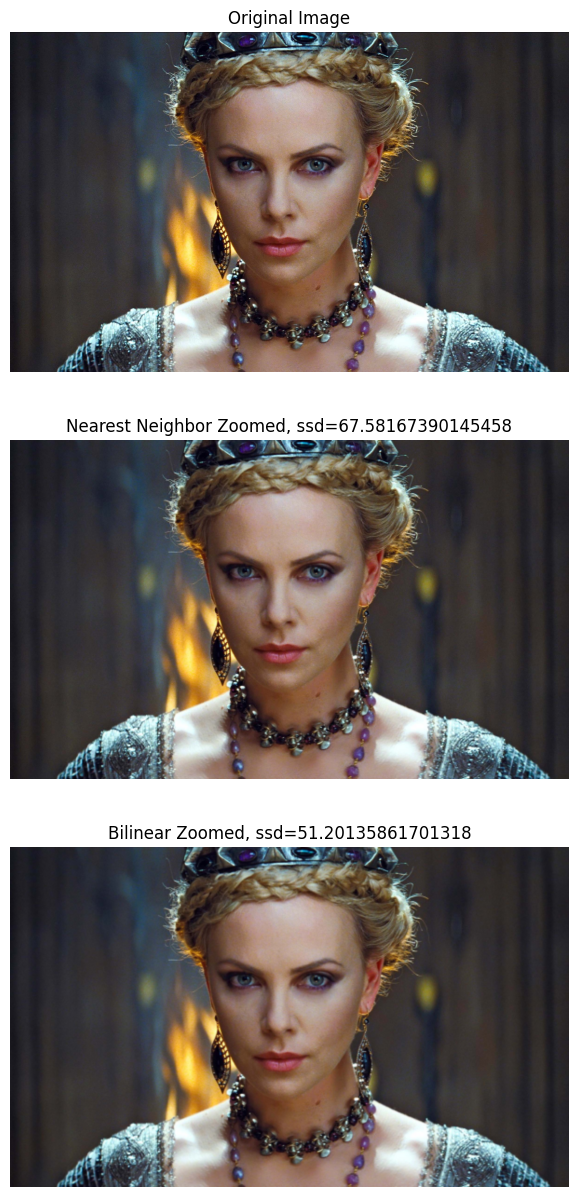

In [6]:
get_zoom_and_orignal_img(small_img=im03_small_img, big_img=im03_img, scale_factor=4, bypass_size_error=True)

Normalized SSD (Nearest Neighbor): 228.6223363095238
Normalized SSD (Bilinear): 197.40949404761903


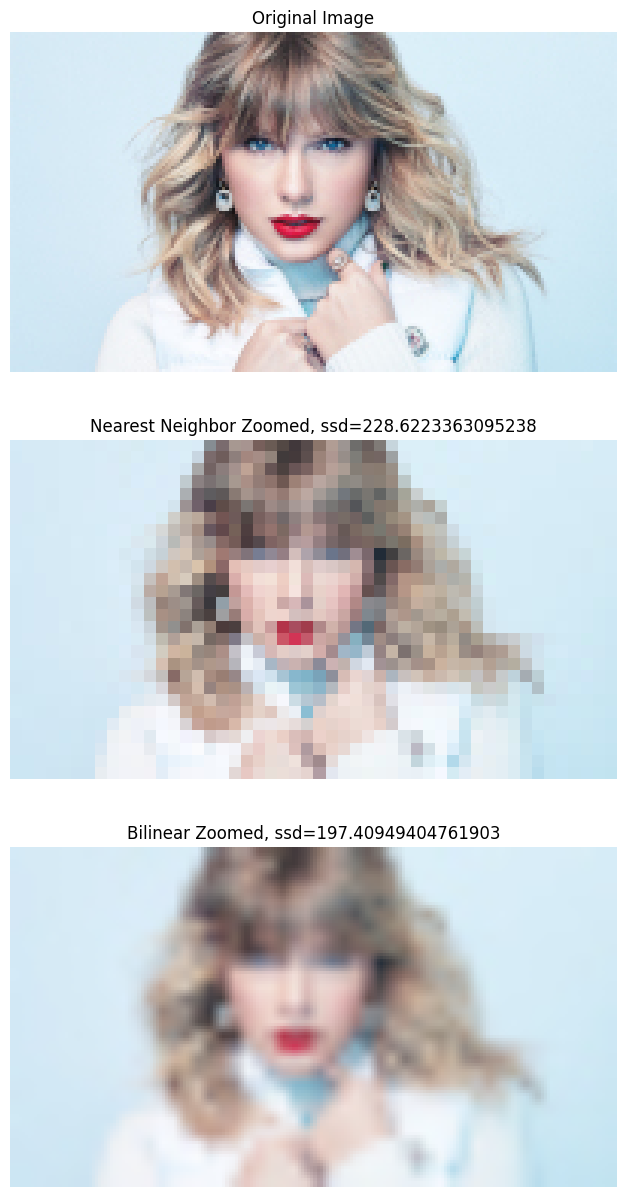

In [7]:
get_zoom_and_orignal_img(small_img=taylor_very_small_img, big_img=taylor_small_img, scale_factor=4, bypass_size_error=False)